<a href="https://colab.research.google.com/github/Delaram73/Jenkins/blob/main/Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


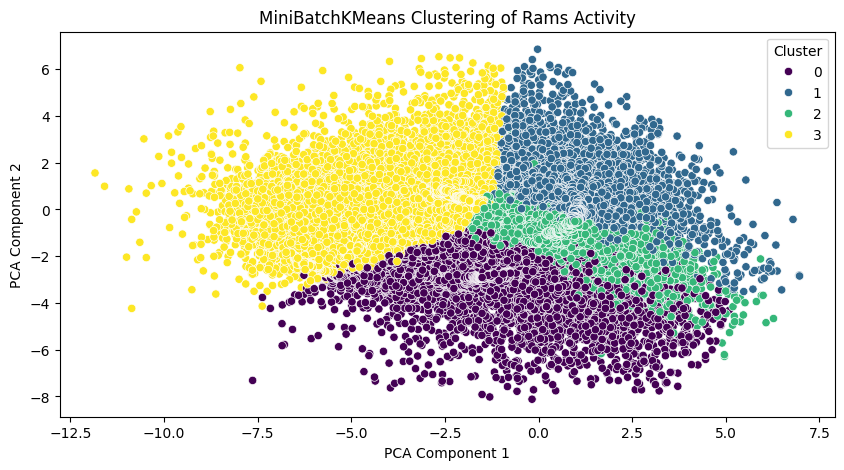

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
#df = pd.read_csv("abp_accel.csv")
df = pd.read_csv("abp_accel.csv", names=["timestamp", "x", "y", "z"], skiprows=1)

# Convert from mg to m/s²
df['x'] = (df['x'] / 1000) * 9.81
df['y'] = (df['y'] / 1000) * 9.81
df['z'] = (df['z'] / 1000) * 9.81

# Feature selection & scaling
features = ['x', 'y', 'z']

X = df[features].fillna(df[features].mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use MiniBatchKMeans instead of AgglomerativeClustering
n_clusters = 4
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette="viridis")
plt.title("MiniBatchKMeans Clustering of Rams Activity")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# Compute cluster summary statistics
cluster_summary = df.groupby('Cluster')[features].agg(['mean', 'std']).round(3)

# Save cluster labels and summary to CSV
df.to_csv("clustered_data.csv", index=False)
cluster_summary.to_csv("cluster_summary.csv")